### Name : Tazmeen Afroz 
### Student ID: 22P-9252
### Course: BAI-4A 
### Date: 2021-10-07
### Task 7

In [53]:
import pandas as pd 

titanic_data = pd.read_csv("titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

'''The features you plan to use are "Pclass" (Passenger
Class), "Gender," "Age," "SibSp" (Number of Siblings/Spouses Aboard), "Parch" (Number of
Parents/Children Aboard), "Fare," and "Embarked" (Port of Embarkation). The target variable you
want to predict is "Survived.'''

features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex', 'Embarked']
target = 'Survived'

'''Step : 1 -> Describe how you would convert categorical features like "Gender" and "Embarked" into
numeric format.'''

le = LabelEncoder()
for cat in categorical_features:
    titanic_data[cat] = le.fit_transform(titanic_data[cat])

X = titanic_data[features + categorical_features]
y = titanic_data[target]

X = X.fillna(X.mean())
y = y.fillna(y.mean())


print("Features: ", X.head())
print("Target: ", y.head())

Features:     Pclass   Age  SibSp  Parch     Fare  Sex  Embarked
0       3  22.0      1      0   7.2500    1         2
1       1  38.0      1      0  71.2833    0         0
2       3  26.0      0      0   7.9250    0         2
3       1  35.0      1      0  53.1000    0         2
4       3  35.0      0      0   8.0500    1         2
Target:  0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [55]:
'''Split the dataset into training and testing sets.
• Train the KNN model on the training set.
• Evaluate the model's accuracy on the testing set.
• Repeat steps 1-3 for different random states (e.g., 1, 10, 42) to observe how the accuracy
varies.'''
random_states = [0,1,3,10,42,75]
accuracy_scores = []
for state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    print("Accuracy score for random state ", state, " is ", accuracy_score(y_test, y_pred))
   



Accuracy score for random state  0  is  0.7430167597765364
Accuracy score for random state  1  is  0.6983240223463687
Accuracy score for random state  3  is  0.6815642458100558
Accuracy score for random state  10  is  0.7150837988826816
Accuracy score for random state  42  is  0.7150837988826816
Accuracy score for random state  75  is  0.7486033519553073


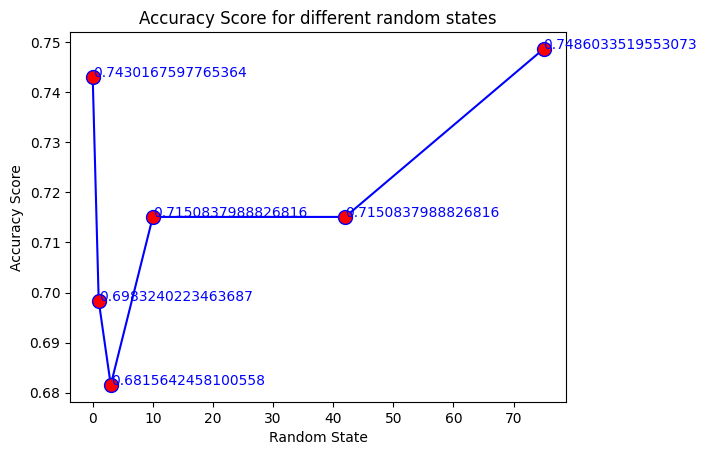

In [59]:
plt.plot(random_states, accuracy_scores, marker='o', color='b', markerfacecolor='r', markersize=10)
plt.xlabel('Random State')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for different random states')

# Add text annotations for each data point
for i, txt in enumerate(accuracy_scores):
    plt.annotate(txt, (random_states[i], accuracy_scores[i]), color='b', size=10)

plt.show()


In [57]:
print("\nObservations:")
print("The observed range of accuracy scores is:", min(accuracy_scores), "to", max(accuracy_scores))
print("The observed mean of accuracy scores is:", np.mean(accuracy_scores))
print("This suggests a moderate level of stability in the model's performance across different random splits.")


Observations:
The observed range of accuracy scores is: 0.6815642458100558 to 0.7486033519553073
The observed mean of accuracy scores is: 0.7169459962756052
This suggests a moderate level of stability in the model's performance across different random splits.
